In [1]:
import mtt
import numpy as np
from copy import copy, deepcopy

In [2]:
# Default simulation values
obj1 = np.array([[0], [0], [1], [1]])
obj2 = np.array([[1], [1], [1], [1]])
initial = {0: obj1}
dt = 1
ep_normal = 1
ep_tangent = 1
nu = 1
ts = 6
miss_p = 0.01
lam = 0.01
fa_scale = 10
gen = mtt.MultiObjSimple(initial, dt, ep_tangent, ep_normal, nu)
params = gen.get_params()
P = params.pop("P")

In [3]:
params

{'f': <bound method MultiObjSimple.process_function of <mtt.multiobject_simple.MultiObjSimple object at 0x15b14adc0>>,
 'A': <bound method MultiObjSimple.process_jacobian of <mtt.multiobject_simple.MultiObjSimple object at 0x15b14adc0>>,
 'h': <bound method MultiObjSimple.measurement_function of <mtt.multiobject_simple.MultiObjSimple object at 0x15b14adc0>>,
 'Q': array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 'W': <bound method MultiObjSimple.W of <mtt.multiobject_simple.MultiObjSimple object at 0x15b14adc0>>,
 'R': array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 'H': array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])}

In [4]:
k = mtt.KalmanFilter(**params)

In [5]:
xt, P = k.time_update(obj1, P)
k.measurement_update(xt, P, obj2)

(array([[1.],
        [1.],
        [1.],
        [1.]]),
 array([[ 6.25000000e-01,  1.58539631e-19,  1.25000000e-01,
         -4.75618892e-19],
        [ 1.58539631e-19,  6.25000000e-01, -4.75618892e-19,
          1.25000000e-01],
        [ 1.25000000e-01, -4.75618892e-19,  6.25000000e-01,
          1.42685668e-18],
        [-4.75618892e-19,  1.25000000e-01,  1.42685668e-18,
          6.25000000e-01]]))

In [6]:
gate = mtt.DistanceGatingMHT(0.9)

tot = -1000
tmm = -2000
tnt = -3000
main = mtt.TrackMaintenanceMHT(tot, tmm, tnt, 1-miss_p, 4, lam, params['R'], k)
hypo = mtt.HypothesisComp()
prune = mtt.Pruning(4)

tracker = mtt.MHTTracker(k, gate, main, hypo, prune)

In [7]:
tracker.measurements

[]

In [8]:
# test = np.zeros(4)
# test.shape = (4,1)
# tracker.predict([test])

In [9]:
tracker.tracks

[]

In [10]:
tracker.get_trajectories()

[]

In [11]:
tracker.tracks

[]

In [12]:
processes = dict()
measures = dict()
measure_colors = dict()
cur_seed = np.random.randint(10**7)
rng = np.random.default_rng(cur_seed)
process = gen.process(50, rng)
processes[len(processes.keys())] = process
measures[len(measures.keys())], measure_colors[len(measure_colors.keys())] = gen.measure(process, rng)
# print(processes[0])

number of tracks:  1
NODES:  1
--------
number of tracks:  3
NODES:  3
--------
number of tracks:  7
NODES:  7
--------
number of tracks:  15
NODES:  15
--------
number of tracks:  28
NODES:  28
--------
number of tracks:  47
NODES:  47
--------
number of tracks:  68
NODES:  68
--------
number of tracks:  86
NODES:  86
--------
number of tracks:  101
NODES:  101
--------
number of tracks:  117
NODES:  117
--------
number of tracks:  131
NODES:  131
--------
number of tracks:  151
NODES:  151
--------


/Users/eduardososa/projects/python/rips-2021-aerospace/mtt/mht/pruning.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  required_obs = np.array(required_obs)


number of tracks:  147
NODES:  147
--------
number of tracks:  152
NODES:  152
--------
number of tracks:  144
NODES:  144
--------
number of tracks:  119
NODES:  119
--------
number of tracks:  115
NODES:  115
--------
number of tracks:  121
NODES:  121
--------
number of tracks:  129
NODES:  129
--------
number of tracks:  136
NODES:  136
--------
number of tracks:  140
NODES:  140
--------
number of tracks:  141
NODES:  141
--------
number of tracks:  140
NODES:  140
--------
number of tracks:  138
NODES:  138
--------
number of tracks:  137
NODES:  137
--------
number of tracks:  137
NODES:  137
--------
number of tracks:  138
NODES:  138
--------
number of tracks:  139
NODES:  139
--------
number of tracks:  140
NODES:  140
--------
number of tracks:  141
NODES:  141
--------
number of tracks:  142
NODES:  142
--------
number of tracks:  143
NODES:  143
--------
number of tracks:  144
NODES:  144
--------
number of tracks:  145
NODES:  145
--------
number of tracks:  146
NODES:  1

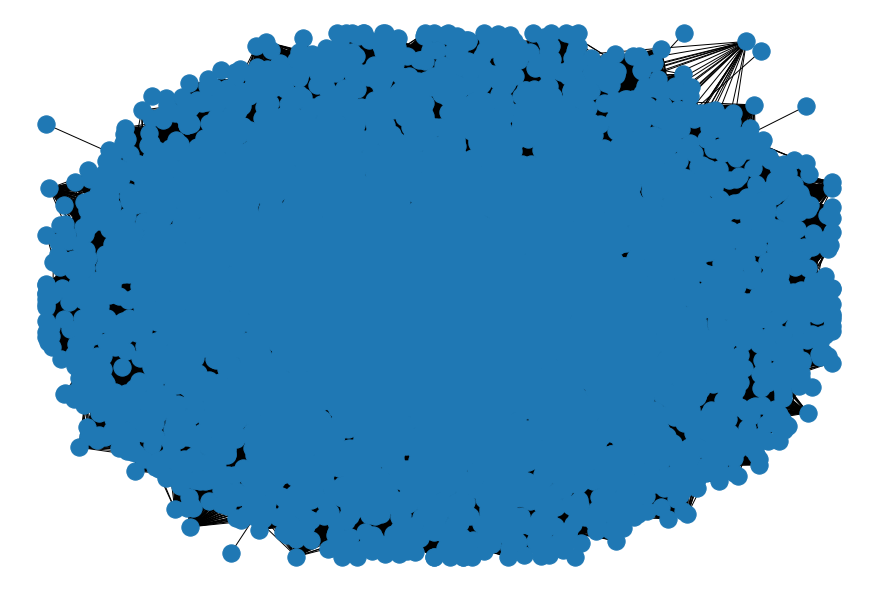

In [13]:
for i in range(len(processes[0])):
    tracker.predict(deepcopy(measures[0][i]))

In [14]:
import networkx as nx
import networkx.algorithms.clique as nxac
g = nx.Graph()
g.add_node(0, weight = 1)
print(nxac.max_weight_clique(g))

([0], 1)
